In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
data['step'].iloc[-1]

9999

In [49]:
def find_commits(data, f0, at_final=True):
    """ 
    Returns a list with the timesteps where the fmin >= f0 and at the final timestep
    """
    commits = [data['step'].iloc[i] for i in range(len(data)) if data['fmin'].iloc[i] >= f0]
    if at_final and commits[-1] != data['step'].iloc[-1]:
        commits += [data['step'].iloc[-1]]
    return commits

In [50]:
## Plot the results

In [54]:
filename = 'result_0_19_20_02_47.csv'
data = pd.read_csv('../model/results/'+filename)

commits = find_commits(data, .2)    

Text(0, 0.5, 'fmin')

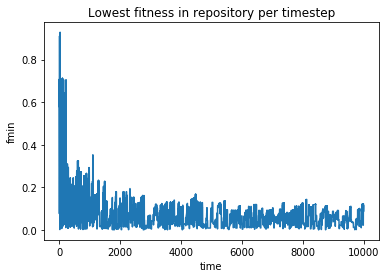

In [55]:
plt.plot(data['fmin'])
# for commit in commits:
#     plt.axvline(commit, alpha=.05, linestyle='-.')
plt.title('Lowest fitness in repository per timestep')
plt.xlabel('time')
plt.ylabel('fmin')

Text(0, 0.5, 'fmin')

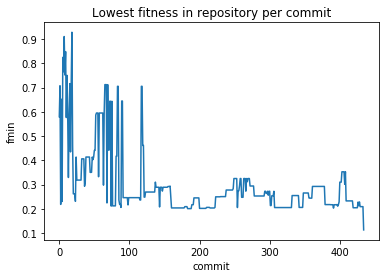

In [56]:
plt.plot(range(len(commits)), data['fmin'].iloc[commits])
plt.title('Lowest fitness in repository per commit')
plt.xlabel('commit')
plt.ylabel('fmin')